<a href="https://colab.research.google.com/github/ranzkov/Machine-Learning/blob/main/Week8Modul9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MATA KULIAH : MACHINE LEARNING**
### **Nama  : Fitriani Novita Maharani**
### **NIM/ABSEN : 2241720235/11**
### **Kelas : TI/3D**

# **Job Sheet 9: Perceptron dan ANN**

## **Praktikum 1**
Klasifikasi Iris dengan Perceptron

**Deskripsi**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

### **Langkah 1 - Import Library**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### **Langkah 2 - Load Data dan Visualisasi**

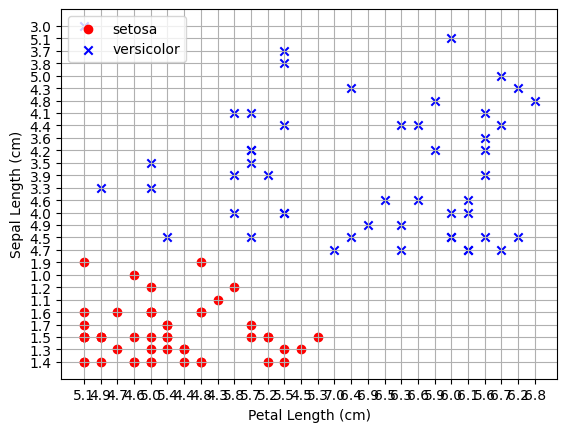

In [48]:
df = pd.read_csv('iris.csv', header=None)

setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']


a, b = 1, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Labeling
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.legend(loc='upper left')
plt.grid()
plt.show()


### **Langkah 3 - Membuat Kelas Perceptron**

In [60]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Label**

In [75]:
# Memilih data untuk klasifikasi (hanya mengambil kolom numerik)
X = df.iloc[0:100, [1, 3]].values.astype(float)  # Mengambil 'SepalLengthCm' dan 'PetalLengthCm'
y = df.iloc[0:100, 5].values  # Ambil 100 data pertama dari kolom 'Species'
y = np.where(y == 'Iris-setosa', -1, 1)  # Ganti label

### **Langkah 5 - Fitting Model**

In [76]:
def train_model(X, y):
    ppn = Perceptron(eta=0.1, n_iter=50)
    ppn.fit(X, y)
    return ppn

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

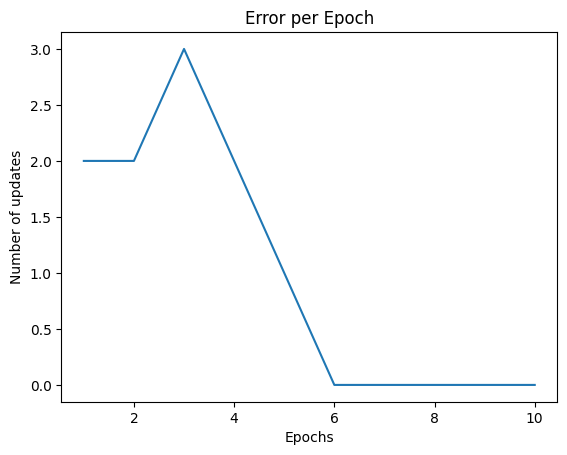

In [78]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Error per Epoch')
plt.show()


### **Langkah 7 - Visualiasasi Decision Boundary**

<ipython-input-92-80d7b90988b3>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


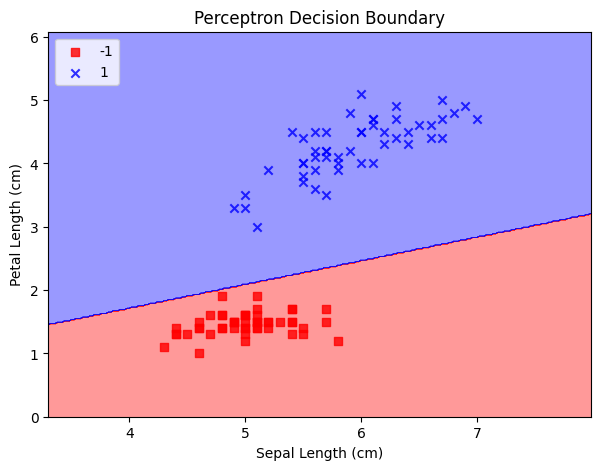

In [92]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Memanggil fungsi untuk plot decision boundary
plt.figure(figsize=(7, 5))
plot_decision_regions(X, y, classifier=ppn)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc='upper left')
plt.show()


## **Praktikum 2**
Klasifikasi Berita dengan Perceptron

**Deskripsi**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

### **Langkah 1 - Import Library**

In [93]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### **Langkah 2 - Pilih Label dan Split Data**

In [94]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [95]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## **Praktikum 3**
Nilai Logika XOR dengan MLP

**Deskripsi**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.



### **Langkah 1 - Import Library**

In [96]:
from sklearn.neural_network import MLPClassifier

### **Langah 2 - Buat Data**

In [97]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### **Langkah 3 - Fit Model**

In [98]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### **Langkah 4 - Prediksi**


In [99]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


### **Praktikum 4**
Klasifikasi dengan ANN

**Deskripsi**

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

In [101]:
# Requires the latest pip
!pip install --upgrade pip

!pip install numpy
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


### **Pra Pengolahan Data**
### **Langkah 1 - Import Library**

In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf

### **Langkah 2 - Load Data**

In [104]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [105]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### **Langkah 3 - Encoding Data Kategorikal**

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### **Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### **Langkah 5 - Split Data**

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Langkah 6 - Scaling Fitur**

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### **Membuat Model ANN**
### **Langkah 1 - Inisiasi Model ANN**

In [114]:
ann = tf.keras.models.Sequential()

### **Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [115]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### **Langkah 3 - Membuat Hidden Layer Kedua**

In [116]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### **Langkah 4 - Membuat Output Layer**

In [117]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**
### **Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [118]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Langkah 2 - Fitting Model**

In [119]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6165 - loss: 0.7071
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4890
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7967 - loss: 0.4519
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8057 - loss: 0.4318
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.4206
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8176 - loss: 0.4020
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8327 - loss: 0.3891
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.3812
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8357 - loss: 0.3839
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8375 - loss: 0.3771
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3595
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

### **Membuat Prediksi**
Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

### **Modelkan Data Baru dan Buat Prediksi**

In [120]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[False]]


Apakah hasilnya False?

### **Prediksi Dengan Data Testing**


In [121]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### **Cek Akurasi dan Confusion Matrix**

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1521   74]
 [ 195  210]]


0.8655